In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-25 06:41:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-25 06:41:36 (109 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train'.
There are 0 directories and 70 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Benign'.
There are 0 directories and 617 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Normal'.
There are 0 directories and 223 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Malignant'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test'.
There are 0 directories and 155 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test/Normal'.
There are 0 directories and 18 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test/Benign'.
There are 0 directories and 55 images in '/content/drive/MyDrive/Tez Dosyaları/ikin

In [4]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test"

In [5]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 910 files belonging to 3 classes.
Found 228 files belonging to 3 classes.


In [6]:
train_data.class_names

['Benign', 'Malignant', 'Normal']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [9]:
image_width = 224
image_height = 224
classes = ['Benign', 'Malignant', 'Normal']
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 3000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break


Found 910 images belonging to 3 classes.
Found 70 images belonging to 1 classes.
Found 223 images belonging to 1 classes.
Found 617 images belonging to 1 classes.


In [12]:
augmented_images3 = os.listdir("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Benign")

# Count the number of augmented images
num_benign_images = len(augmented_images3)

# Print the number of malignant images
print("Number of benign images:", num_benign_images)

Number of benign images: 3070


In [13]:
augmented_images2 = os.listdir("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Normal")

# Count the number of augmented images
num_normal_images = len(augmented_images2)

# Print the number of malignant images
print("Number of normal images:", num_normal_images)

Number of normal images: 3617


In [14]:
# Load the augmented images for the malignant class
augmented_images = os.listdir("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Malignant")

# Count the number of augmented images
num_malignant_images = len(augmented_images)

# Print the number of malignant images
print("Number of malignant images:", num_malignant_images)

Number of malignant images: 3223


In [15]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train'.
There are 0 directories and 3070 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Benign'.
There are 0 directories and 3617 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Normal'.
There are 0 directories and 3223 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Train/Malignant'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test'.
There are 0 directories and 155 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test/Normal'.
There are 0 directories and 18 images in '/content/drive/MyDrive/Tez Dosyaları/ikinci veriseti 3 class/Test/Benign'.
There are 0 directories and 55 images in '/content/drive/MyDrive/Tez Dosyaları/

In [38]:
import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.VGG19(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])


80134624/80134624 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 512)
Shape after GlobalAveragePooling2D: (None, 512)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240725-080730
Epoch 1/40
29/29 [==============================] - 11s 279ms/step - loss: 1.3680 - accuracy: 0.5736 - val_loss: 1.1300 - val_accuracy: 0.6623
Epoch 2/40
29/29 [==============================] - 10s 272ms/step - loss: 1.0510 - accuracy: 0.6275 - val_loss: 1.0116 - val_accuracy: 0.6798
Epoch 3/40
29/29 [==============================] - 10s 277ms/step - loss: 0.9238 - accuracy: 0.6582 - val_loss: 0.9401 - val_accuracy: 0.6184
Epoch 4/40
29/29 [==============================] - 10s 279ms/step - loss: 0.8550 - accuracy: 0.6648 - val_loss: 0.9069 - val_accuracy: 0.6447
Epoch 5/40
29/29 [==============================] - 10s 277ms/step - loss: 0.7955 - accuracy: 0.6879 - val_loss: 0.8940 - val_accuracy: 0.6930
Epoch 6/40
29

In [39]:

# Evaluate the model on the test data
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

8/8 [==============================] - 2s 126ms/step - loss: 0.9752 - accuracy: 0.6535


[0.9751855731010437, 0.6535087823867798]

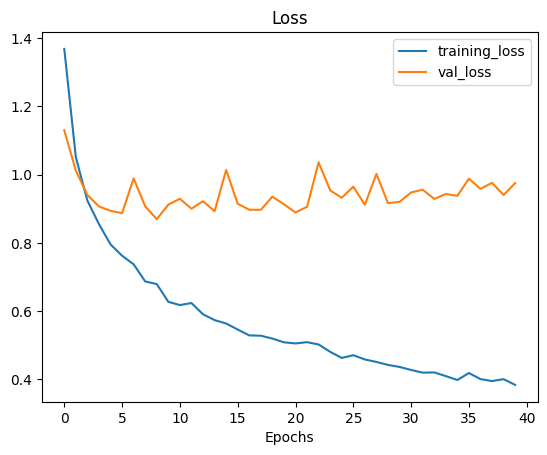

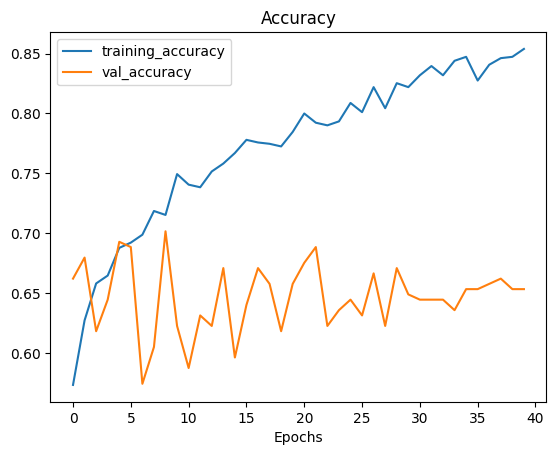

In [40]:

plot_loss_curves(history_0)

In [41]:
from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

8/8 [==============================] - 3s 146ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.25      0.33      0.28        55
           2       0.69      0.66      0.68       155

    accuracy                           0.53       228
   macro avg       0.31      0.33      0.32       228
weighted avg       0.53      0.53      0.53       228



In [42]:
# Eğitim doğruluğunu geçmiş verilerinden al
train_accuracy = history_0.history['accuracy']

# Son epoch'un eğitim doğruluğunu yazdır
print("Eğitim doğruluğu:", train_accuracy[-1])


Eğitim doğruluğu: 0.8538461327552795
